In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [28]:
digits = datasets.load_digits() # 加载数据 [ˈdɪdʒɪts]

In [29]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [30]:
digits.images.shape

(1797, 8, 8)

In [31]:
digits.target.shape

(1797,)

In [32]:
images_and_labels = list(zip(digits.images, digits.target))  #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

In [9]:
images_and_labels

[(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
         [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
         [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
         [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
         [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
         [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
         [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
         [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0),
 (array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
         [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
         [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]), 1),
 (array([[  0.,   0.,   0.,   4.,  15.,  12.

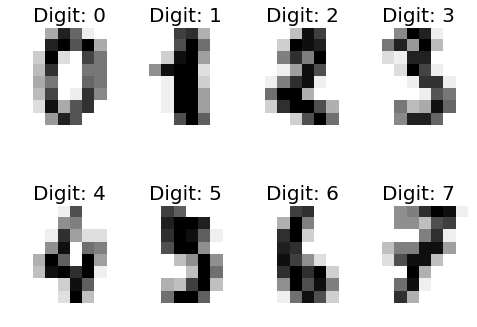

In [10]:
# 把数据所代表的图片显示出来
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off') #关闭坐标轴
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') 
    plt.title('Digit: %i' % label, fontsize=20);

#enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
# 0 （图像 目标）  1 （图像  目标）

In [9]:
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


In [14]:
# 把数据分成训练数据集和测试数据集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=2);

In [15]:
# 使用支持向量机来训练模型
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100., probability=True)
clf.fit(Xtrain, Ytrain);

In [16]:
# 评估模型的准确度
from sklearn.metrics import accuracy_score
Ypred = clf.predict(Xtest);
accuracy_score(Ytest, Ypred)

0.97777777777777775

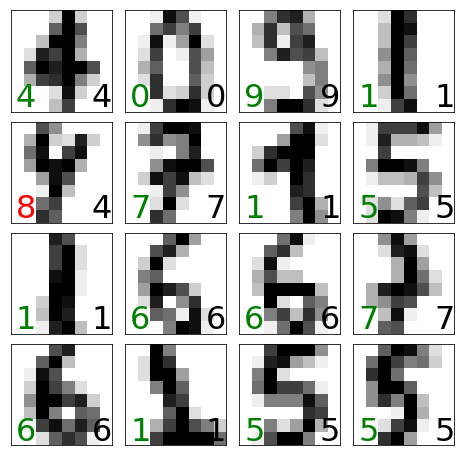

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))#plt.subplots() 返回一个 Figure实例fig 和一个 AxesSubplot实例ax 。这个很好理解，fig代表整个图像，ax代表坐标轴和画的图。 
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])
    
#使用transform来指定text在图片中的相对位置
#去掉x、y坐标轴刻度
#在matplotlib中，整个图像为一个Figure对象。在Figure对象中可以包含一个或者多个Axes对象

In [25]:
# 保存模型参数
from sklearn.externals import joblib
joblib.dump(clf, 'digits_svm.pkl')

['digits_svm.pkl']

In [26]:
# 导入模型参数，直接进行预测
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(Xtest)
clf.score(Xtest, Ytest)

0.97777777777777775